In [22]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')

C:\Users\17059\Desktop\BigData
C:\Users\17059\Desktop\BigData\images
PIL image size (224, 224)


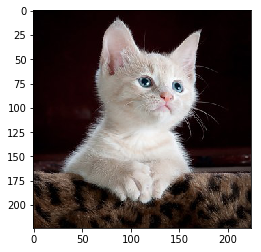

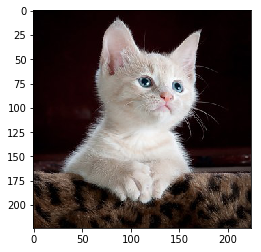

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
[[('n02124075', 'Egyptian_cat', 0.4049535), ('n02123045', 'tabby', 0.3942576), ('n02127052', 'lynx', 0.10080725), ('n02123159', 'tiger_cat', 0.05541087), ('n02123394', 'Persian_cat', 0.012944666)]]
PIL image size (224, 224)


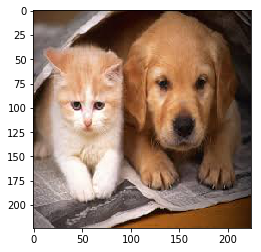

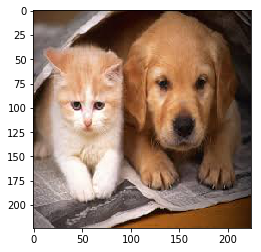

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
[[('n02099601', 'golden_retriever', 0.62682486), ('n02099712', 'Labrador_retriever', 0.26682746), ('n02808304', 'bath_towel', 0.011000982), ('n02088466', 'bloodhound', 0.006998717), ('n02090379', 'redbone', 0.0055709733)]]
PIL image size (224, 224)


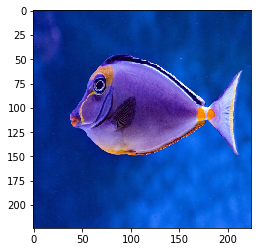

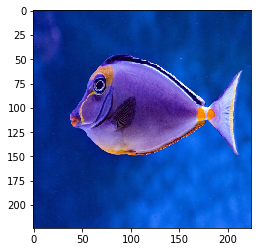

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
[[('n02606052', 'rock_beauty', 0.81457144), ('n01496331', 'electric_ray', 0.09466354), ('n01498041', 'stingray', 0.038609132), ('n02655020', 'puffer', 0.011262267), ('n02607072', 'anemone_fish', 0.009718927)]]
PIL image size (224, 224)


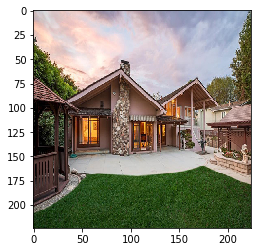

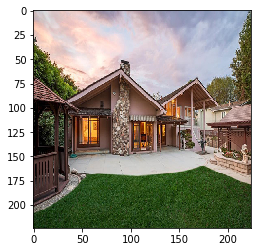

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
[[('n02859443', 'boathouse', 0.42237583), ('n03899768', 'patio', 0.42175072), ('n03776460', 'mobile_home', 0.028971152), ('n03028079', 'church', 0.022965368), ('n09332890', 'lakeside', 0.020443752)]]
PIL image size (224, 224)


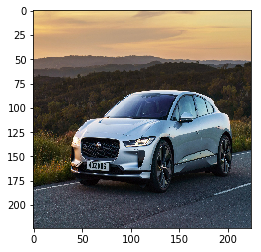

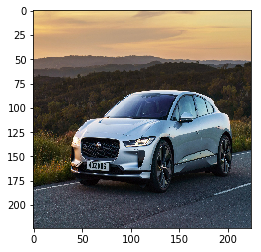

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
[[('n03930630', 'pickup', 0.25085935), ('n04037443', 'racer', 0.16108784), ('n04285008', 'sports_car', 0.1478414), ('n03100240', 'convertible', 0.12275199), ('n02974003', 'car_wheel', 0.10857254)]]
PIL image size (224, 224)


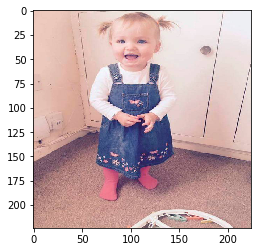

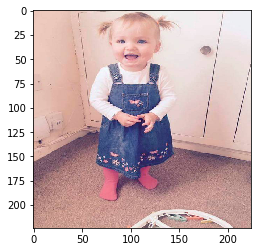

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
[[('n03877472', 'pajama', 0.061883893), ('n15075141', 'toilet_tissue', 0.053983476), ('n03935335', 'piggy_bank', 0.043503903), ('n04447861', 'toilet_seat', 0.04228444), ('n02971356', 'carton', 0.030240832)]]
PIL image size (224, 224)


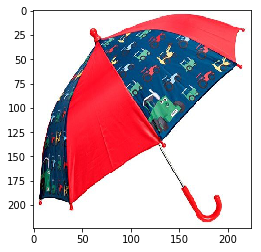

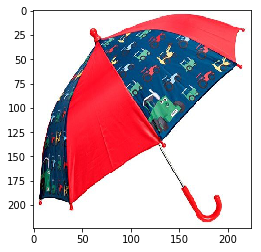

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
[[('n04507155', 'umbrella', 0.99815375), ('n03888257', 'parachute', 0.0009230035), ('n03792972', 'mountain_tent', 0.00041237284), ('n03355925', 'flagpole', 0.00026127658), ('n04371430', 'swimming_trunks', 6.1023005e-05)]]


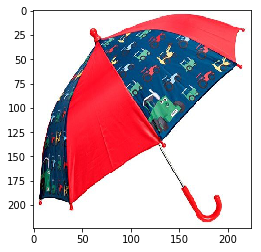

In [27]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
import numpy as np
import os 
import matplotlib.pyplot as plt
%matplotlib inline

BASE_DIR = os.path.dirname(os.path.abspath("__file__"))
image_dir = os.path.join(BASE_DIR,"images")

for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith("jpg") or file.endswith("png") or file.endswith("jpeg"):
            
            path=os.path.join(root, file)
            
            # load an image in PIL format 
            original = load_img(path, target_size=(224, 224))
            print('PIL image size',original.size)
            plt.imshow(original)
            plt.show()
            
            # convert the PIL image to a numpy array
            # IN PIL - image is in (width, height, channel)
            # In Numpy - image is in (height, width, channel)
            numpy_image = img_to_array(original)
            plt.imshow(np.uint8(numpy_image))
            plt.show()
            print('numpy array size',numpy_image.shape)
             
            # Convert the image / images into batch format
            # expand_dims will add an extra dimension to the data at a particular axis
            # We want the input matrix to the network to be of the form (batchsize, height, width, channels)
            # Thus we add the extra dimension to the axis 0.
            image_batch = np.expand_dims(numpy_image, axis=0)
            print('image batch size', image_batch.shape)
            plt.imshow(np.uint8(image_batch[0]))
            
            # prepare the image for the VGG model
            processed_image = vgg16.preprocess_input(image_batch.copy())
             
            # get the predicted probabilities for each class
            predictions = vgg_model.predict(processed_image)
            # print predictions
             
            # convert the probabilities to class labels
            # We will get top 5 predictions which is the default
            label = decode_predictions(predictions)
            print (label)

In [ ]:
#Sources
https://www.learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/